In [1]:
import pandas as pd 
import numpy as np 



In [2]:
housing=pd.read_csv('D:\\New folder\\Machine-Learning-with-Real-World-Projects-master\\Section 2\\Multiple Linear Regression\\Housing.csv')

housing.info()

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Preparation

In [4]:
#converting mainroad	guestroom	basement	hotwaterheating,airconditioning to 0s and 1s 
housing['mainroad']=housing['mainroad'].map({'yes':1,'no':0}) 
housing['guestroom']=housing['guestroom'].map({'yes':1,'no':0}) 
housing['basement']=housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating']=housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning']=housing['airconditioning'].map({'yes':1,'no':0})
housing['prefarea']=housing['prefarea'].map({'yes':1,'no':0})

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


So, Furnishing status we can't change to 0,1,2 instead we change like if value is furnished then 1 0 0 it is 1 for furnished and 0 for semifurnished and 0 for unfurnished.

In [6]:
status=pd.get_dummies(housing['furnishingstatus'])

In [7]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [8]:
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True)

In [9]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [10]:
housing=pd.concat([housing,status],axis=1)

In [11]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [12]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Creating a new Variable

In [14]:
#area per bedroom 
housing['areaperbedroom']=housing['area']/housing['bedrooms']

In [15]:
#Bathrooms per bedroom
housing['bbratio']=housing['bathrooms']/housing['bedrooms']

In [16]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


# Rescaling the features

it is important to rescale the features so they have comparable scale. This can be important for certain machine learning algorithms that are sensitive to the scale of the input features.
1. Normalization: This method scales the data to a specific range, often between 0 and 1. 
2. Min-Max Scaling: x scaled=(x-min(x))/max(x)-min(x)

In [17]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
housing = housing.apply(normalize) 

In [18]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [19]:
#puttinf feature var for x 

x=housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

#putting response var for y 

y=housing['price']

In [20]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [21]:
import statsmodels.api as sm 
x_train=sm.add_constant(x_train) 

#Creating a fitting model 
lm_l=sm.OLS(y_train,x_train).fit()

In [22]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           4.56e-82
Time:                        21:19:50   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

# Removing Values with higher VIF(variance inflation factor) and p-value(0.01-0.05)

In [26]:
def cal_vif(input_data,dep_col):
    vif_df=pd.DataFrame(columns=['var','vif']) 
    x_vars=input_data.drop([dep_col],axis=1) 
    x_vars_names=x_vars.columns
    for i in range(0,x_vars_names.shape[0]):
        y=x_vars[x_vars_names[i]]
        x=x_vars[x_vars_names.drop(x_vars_names[i])] 
        model=sm.OLS(y,x).fit()
        rsq = model.rsquared
        vif=round(1/(1-rsq),2) 
        vif_df.loc[i]=[x_vars_names[i],vif]
    return vif_df.sort_values(by='vif',axis=0,ascending=False,inplace=False)

In [27]:
cal_vif(input_data=housing,dep_col="price")

,var,vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


In [28]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

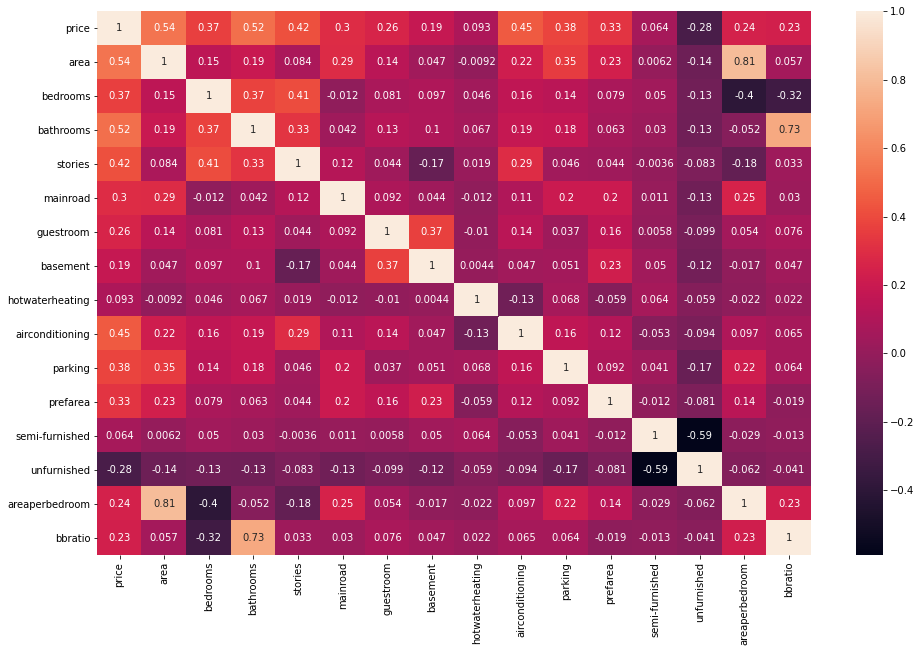

In [29]:
plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(),annot=True)

In [30]:
x_train=x_train.drop('bbratio',1)

In [31]:
lm_2=sm.OLS(y_train,x_train).fit()

In [32]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           6.46e-83
Time:                        12:13:12   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [34]:
cal_vif(input_data=housing.drop(["bbratio"],axis=1),dep_col="price")

,var,vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [35]:
x_train=x_train.drop('bedrooms',1)

In [36]:
lm_3=sm.OLS(y_train,x_train).fit()

In [37]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.66e-83
Time:                        12:32:38   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [39]:
cal_vif(input_data=housing.drop(['bedrooms','bbratio'],axis=1),dep_col="price")

,var,vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


In [40]:
x_train=x_train.drop('areaperbedroom',1)

In [41]:
lm_4=sm.OLS(y_train,x_train).fit()

In [42]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           2.35e-83
Time:                        12:56:28   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [43]:
cal_vif(input_data=housing.drop(['areaperbedroom','bedrooms','bbratio'],axis=1),dep_col="price")

,var,vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [45]:
x_train = x_train.drop('semi-furnished', 1)

In [46]:
lm_5 = sm.OLS(y_train,x_train).fit()

In [47]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           2.73e-84
Time:                        13:26:30   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [49]:
cal_vif(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished"], axis=1), dep_col="price")

,var,vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [51]:
x_train = x_train.drop('basement', 1)

In [53]:
lm_6 = sm.OLS(y_train,x_train).fit()

In [54]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           3.13e-84
Time:                        13:29:11   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [56]:
cal_vif(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1), dep_col="price")

,var,vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


# Making predictions using final model

In [57]:
x_test_m6=sm.add_constant(x_test)

In [58]:
x_test_m6=x_test_m6.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"],axis=1)

In [59]:
y_pred_m6=lm_6.predict(x_test_m6)

# Model evaluation


Text(0, 0.5, 'Housing Price')

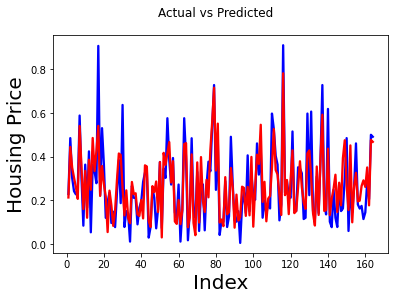

In [63]:
c=[i for i in range(1,165,1)] 
fig=plt.figure() 
plt.plot(c,y_test,color="blue",linewidth=2.3,linestyle="-") 
plt.plot(c,y_pred_m6,color="red",linewidth=2.3,linestyle="-") 
fig.suptitle("Actual vs Predicted") 
plt.xlabel('Index',fontsize=20)
plt.ylabel('Housing Price',fontsize=20)

Text(0, 0.5, 'test-predict')

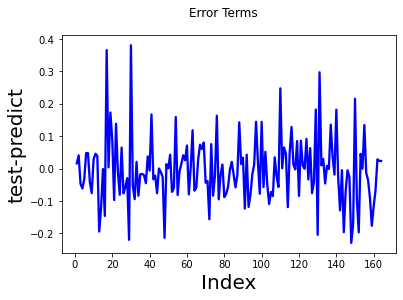

In [66]:
fig=plt.figure() 
c=[i for i in range(1,165,1)] 
plt.plot(c,y_test-y_pred_m6,color="blue",linewidth=2.3,linestyle="-") 
fig.suptitle("Error Terms") 
plt.xlabel('Index',fontsize=20)
plt.ylabel('test-predict',fontsize=20)

C:\Users\Rohith varma\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'indx')

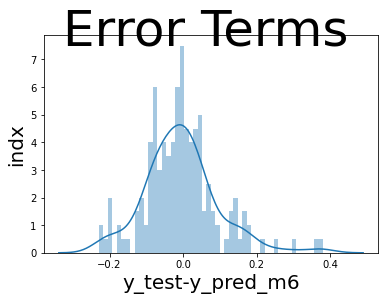

In [68]:
fig=plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50) 
fig.suptitle("Error Terms",fontsize=50)
plt.xlabel('y_test-y_pred_m6',fontsize=20)
plt.ylabel('indx',fontsize=20)

In [69]:
from sklearn import metrics

In [70]:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_m6)))

RMSE:  0.10001092336807836


# Automation Using RFE


In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()
rfe=RFE(lm,9) 
rfe=rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
# same steps like building model, running model, model evaluation just like vif